In [ ]:
from PIL import Image

def encode(img_path, msg, save_path):
    try:
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')  # Convert image to RGB mode if not already in RGB
    except FileNotFoundError:
        raise FileNotFoundError('Image file not found')
    except Exception as e:
        print(f"Error: {e}")
        return

    width, height = img.size
    encoded_img = img.copy()
    bin_msg = ''.join(format(ord(char), '08b') for char in msg)
    msg_len = len(bin_msg)
    if msg_len > width * height * 3:
        raise ValueError('Message too long for the image')

    index = 0
    for y in range(height):
        for x in range(width):
            if index < msg_len:
                r, g, b = img.getpixel((x, y))
                r = r & ~1 | int(bin_msg[index])
                index += 1
                if index < msg_len:
                    g = g & ~1 | int(bin_msg[index])
                    index += 1
                    if index < msg_len:
                        b = b & ~1 | int(bin_msg[index])
                        index += 1
                encoded_img.putpixel((x, y), (r, g, b))


    try:
        encoded_img.save(save_path)
        print("Encoded image saved successfully.")
    except Exception as e:
        print(f"Error saving encoded image: {e}")

    return encoded_img

def decode_image(encoded_image_path):
    encoded_img = Image.open(encoded_image_path)
    width, height = encoded_img.size
    binary_message = ''

    for y in range(height):
        for x in range(width):
            r, g, b = encoded_img.getpixel((x, y))
            binary_message += str(r & 1)
            binary_message += str(g & 1)
            binary_message += str(b & 1)

    # Convert binary message to ASCII
    message = ''
    for i in range(0, len(binary_message), 8):
        message += chr(int(binary_message[i:i+8], 2))
        if message[-1] == '\x00':
            break

    return message


msg = 'hi how are you'
img_path = '/content/images.png'
save_path = '/content/dd/encoded.png'
encoded_img = encode(img_path, msg, save_path)

# Decode the message from the encoded image
decoded_message = decode_image(save_path)
print("Decoded message:", decoded_message)

Encoded image saved successfully.
Decoded message: hi how are youÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿøÿÀÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿøÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÀ 


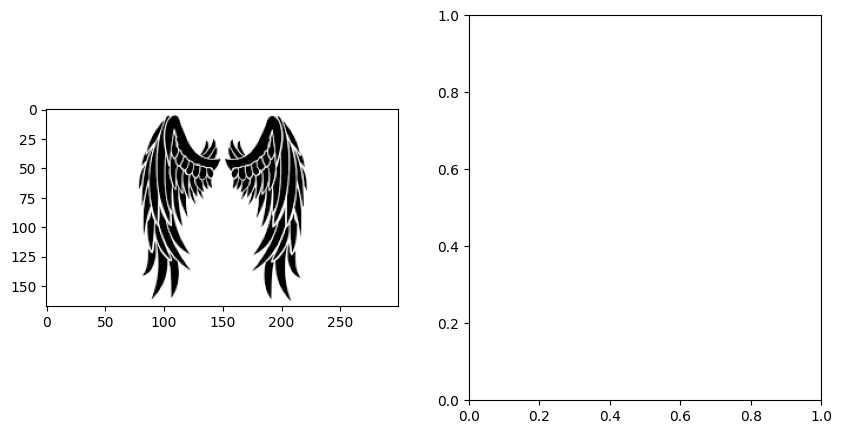

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].imshow(encoded_img)
